<a href="https://colab.research.google.com/github/Rafiul-124/CSE_Assignment24/blob/main/Student_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
!ls "/content/drive/MyDrive/Student Dataset"


'Student Dataset'   Untitled0.ipynb


In [ ]:
!find /content/drive/MyDrive/ -name "student_dataset.csv"


/content/drive/MyDrive/Student Dataset/Student Dataset/student_dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Student Dataset/Student Dataset/student_dataset.csv")

print(df.head())
print(df.info())


       Student_Names   Phone_No.  Math  Physics  Chemistry Grade  \
0   Donald Contreras  9208625450    76       84         54    B+   
1      Joseph Horton  9886408555    91       75         78     A   
2  Savannah Burns MD  9047592659    64       98         20     C   
3     William Carter  9048473864    15       95         32     D   
4     John Rodriguez  9685225730    86       86         66    B+   

                    Comment  Roll No.           School Name  \
0            Good Pursuance    524613  Martin Luther School   
1      Very Good Achivement    561635  Martin Luther School   
2  Below Average Achivement    560985  Martin Luther School   
3            Poor Pursuance    535126  Martin Luther School   
4            Good Pursuance    559410  Martin Luther School   

                                     Student Address  
0             478 Mooney Park, New Valerie, VI 28836  
1            037 Matthew Shores, Greeneton, CA 98399  
2         96124 Lloyd Streets, Edwardmouth, DC 

In [ ]:
# Step 3: Handle Missing Values
print(df.isnull().sum())
df = df.dropna()   # missing value থাকলে বাদ দাও (অথবা fillna ব্যবহার করতে পারো)


Student_Names      0
Phone_No.          0
Math               0
Physics            0
Chemistry          0
Grade              0
Comment            0
Roll No.           0
School Name        0
Student Address    0
dtype: int64


In [ ]:
# Step 4: Encode Categorical Data
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

print(df.head())


   Student_Names   Phone_No.  Math  Physics  Chemistry  Grade  Comment  \
0           2388  9208625450    76       84         54      3        4   
1           4116  9886408555    91       75         78      0        6   
2           7284  9047592659    64       98         20      4        1   
3           8386  9048473864    15       95         32      5        5   
4           3934  9685225730    86       86         66      3        4   

   Roll No.  School Name  Student Address  
0    524613            0             3945  
1    561635            0              329  
2    560985            0             7708  
3    535126            0             1052  
4    559410            0              434  


In [ ]:
print(df.columns)


Index(['Student_Names', 'Phone_No.', 'Math', 'Physics', 'Chemistry', 'Grade',
       'Comment', 'Roll No.', 'School Name', 'Student Address'],
      dtype='object')


In [ ]:
# Features (যে সব column থেকে prediction হবে)
X = df.drop("Grade", axis=1)

# Target (যা predict করতে চাইছ)
y = df["Grade"]

print(X.head())
print(y.head())


   Student_Names   Phone_No.  Math  Physics  Chemistry  Comment  Roll No.  \
0           2388  9208625450    76       84         54        4    524613   
1           4116  9886408555    91       75         78        6    561635   
2           7284  9047592659    64       98         20        1    560985   
3           8386  9048473864    15       95         32        5    535126   
4           3934  9685225730    86       86         66        4    559410   

   School Name  Student Address  
0            0             3945  
1            0              329  
2            0             7708  
3            0             1052  
4            0              434  
0    3
1    0
2    4
3    5
4    3
Name: Grade, dtype: int64


In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


***Summary Statistics***

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
print("Numeric Columns Summary:")
print(df[numeric_cols].describe())

categorical_cols = df.select_dtypes(include='object').columns
print("\nCategorical Columns Summary:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Numeric Columns Summary:
       Student_Names     Phone_No.         Math      Physics    Chemistry  \
count     9000.00000  9.000000e+03  9000.000000  9000.000000  9000.000000   
mean      4249.43200  9.498521e+09    55.276111    54.697556    54.854889   
std       2444.95661  2.865630e+08    26.109140    26.232446    26.261320   
min          0.00000  9.000052e+09    10.000000    10.000000    10.000000   
25%       2136.75000  9.251158e+09    33.000000    32.000000    32.000000   
50%       4222.50000  9.498910e+09    56.000000    55.000000    55.000000   
75%       6360.25000  9.745590e+09    78.000000    77.000000    77.000000   
max       8496.00000  9.999838e+09   100.000000   100.000000   100.000000   

             Grade      Comment       Roll No.  School Name  Student Address  \
count  9000.000000  9000.000000    9000.000000       9000.0      9000.000000   
mean      3.789333     2.783778  550174.095667          0.0      4499.500000   
std       1.480119     2.117538   28955.4

***Distribution Plots***

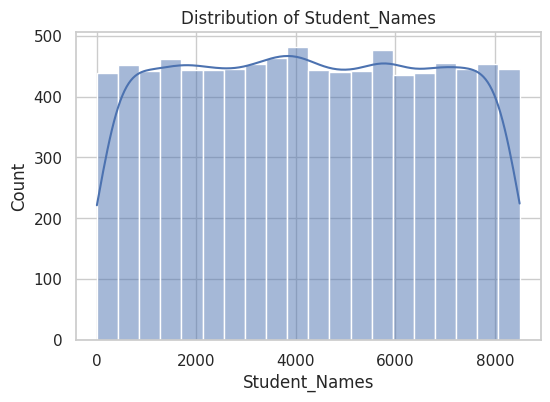

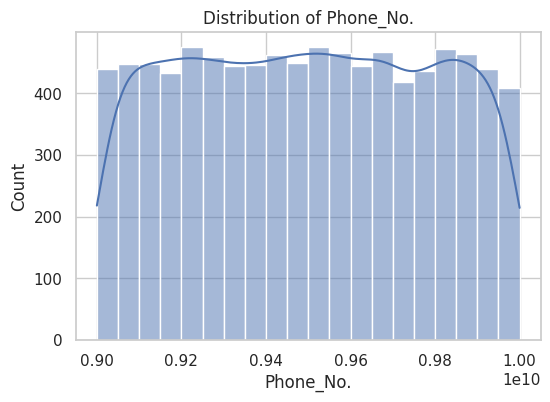

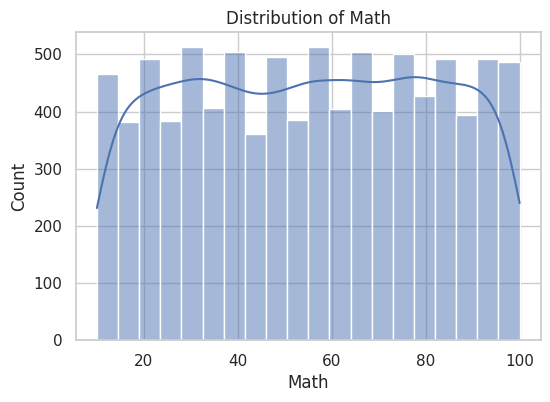

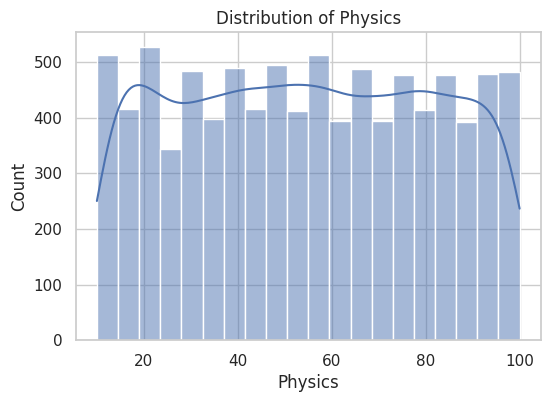

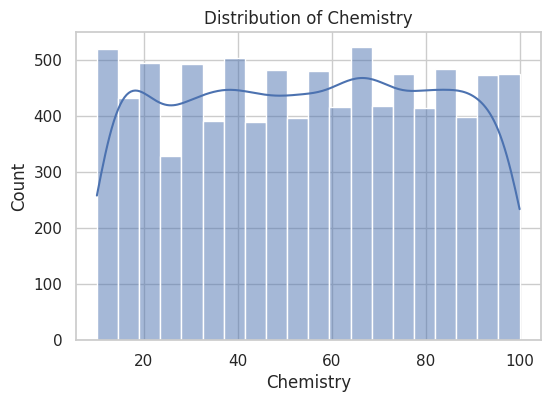

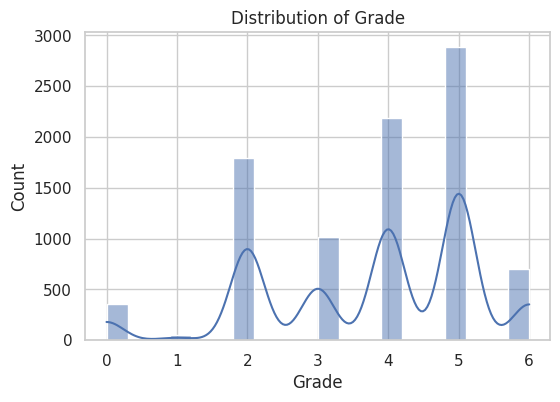

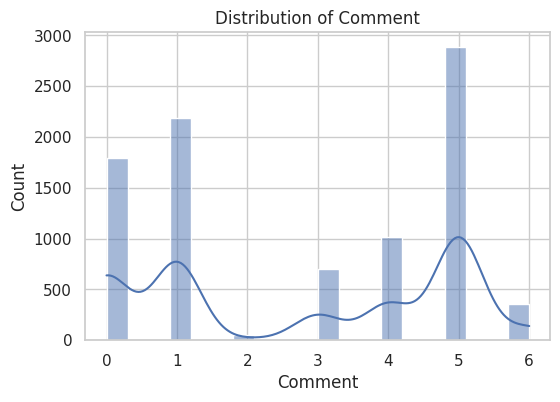

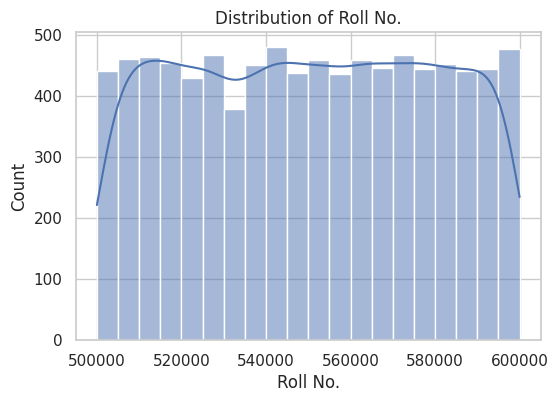

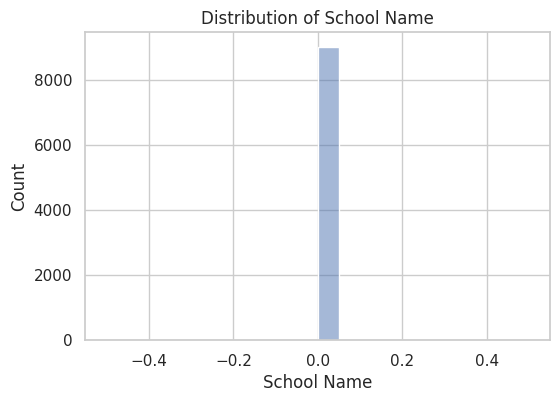

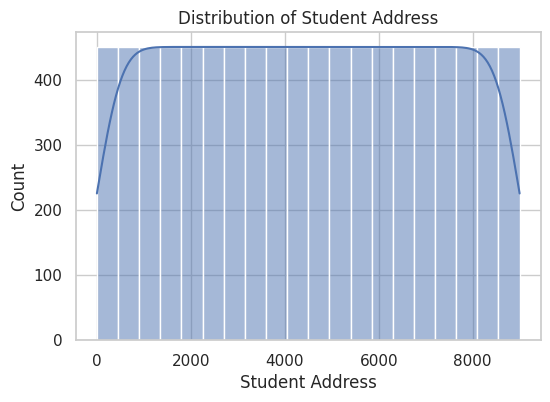

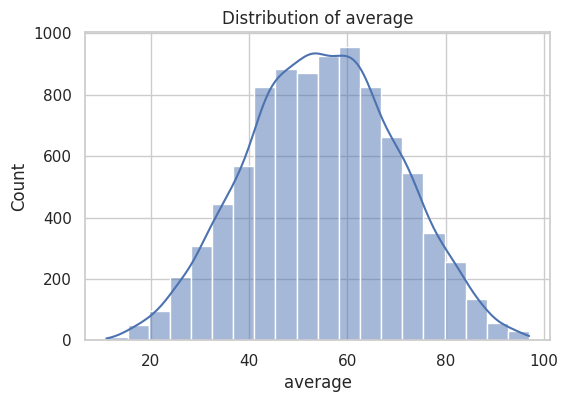

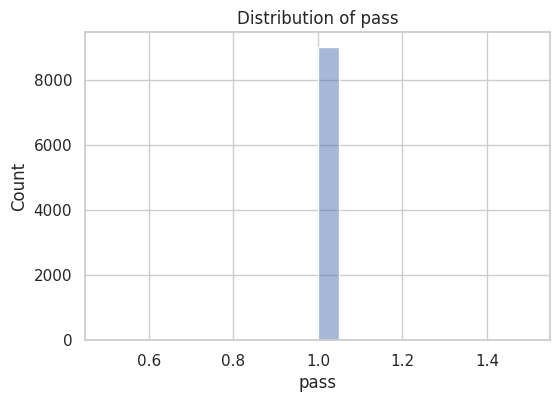

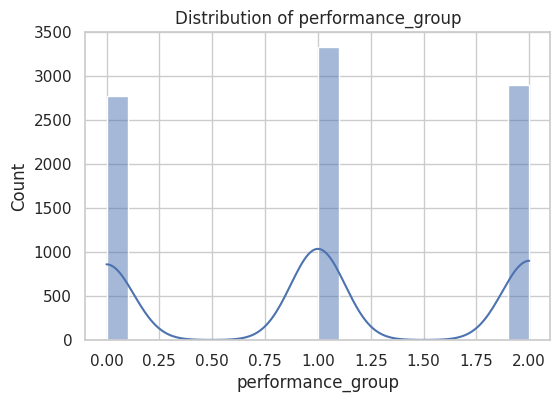

In [ ]:

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


***Distribution Plots***

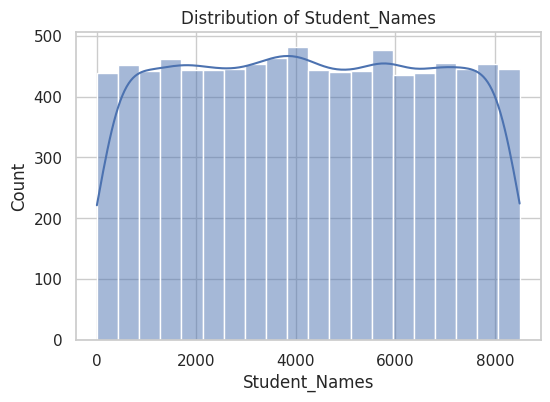

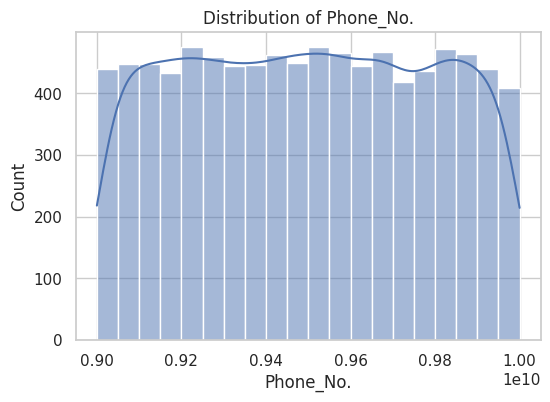

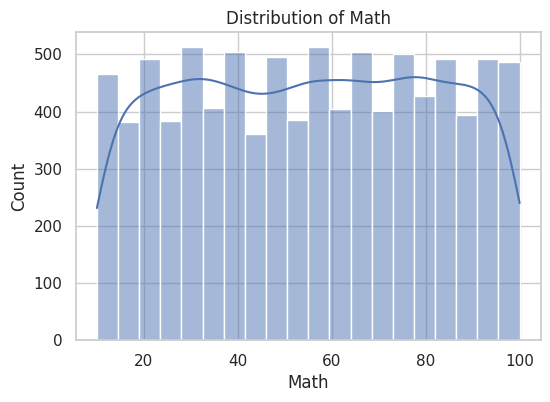

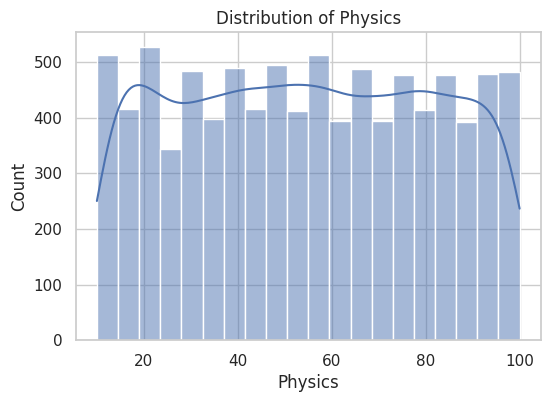

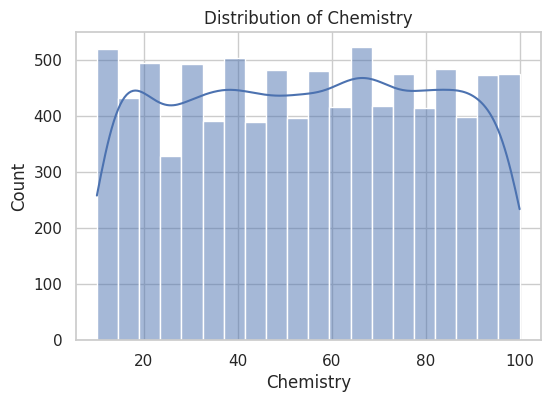

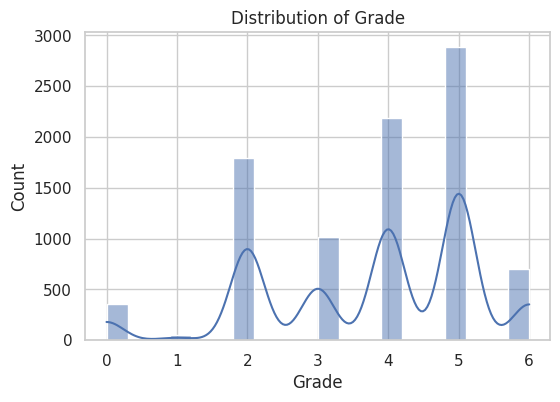

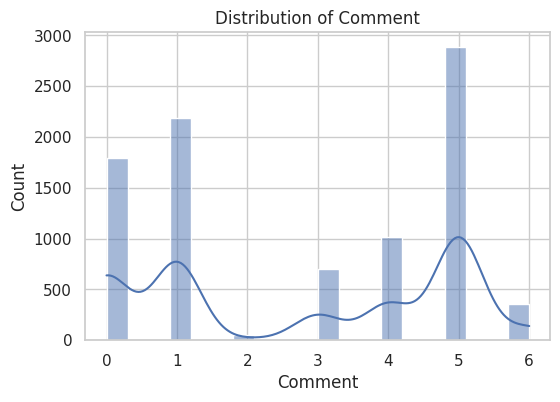

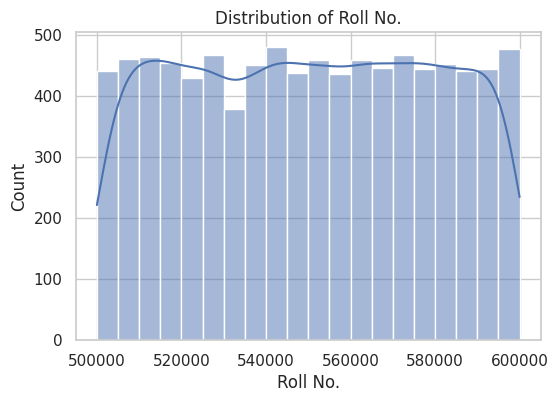

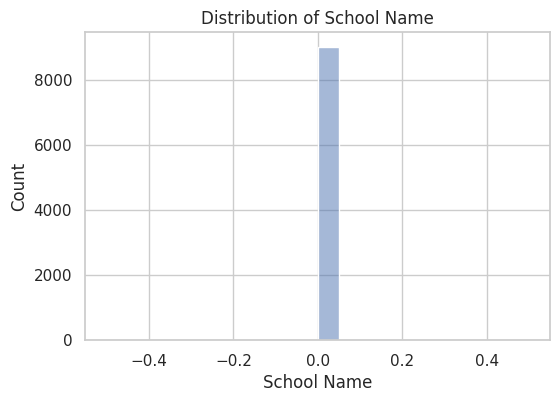

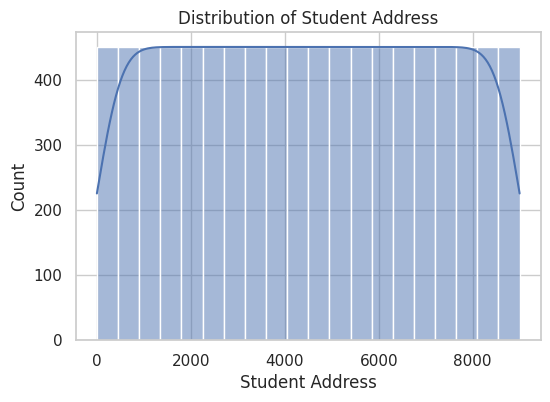

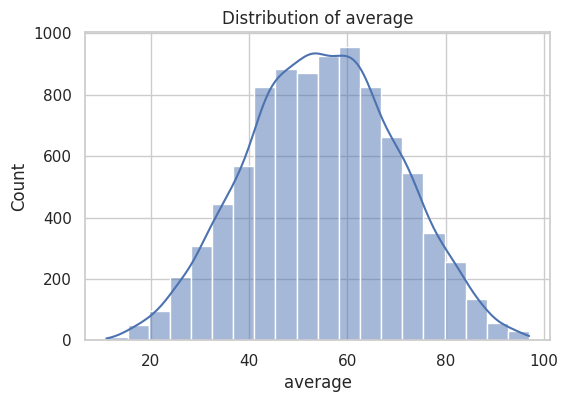

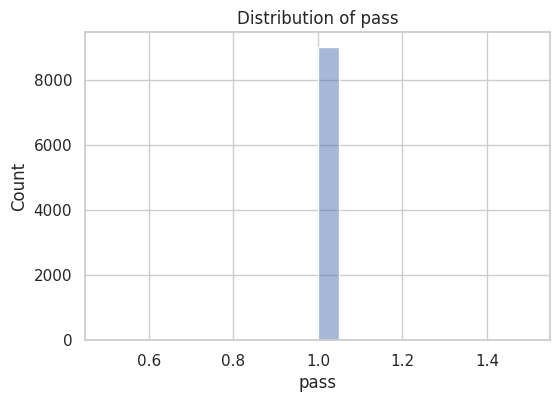

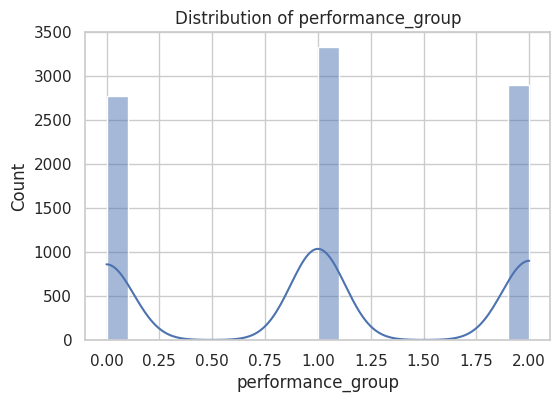

In [ ]:

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


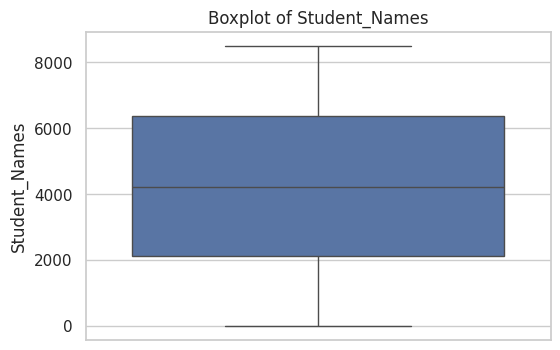

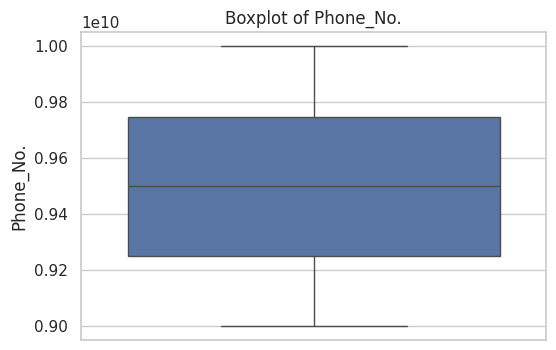

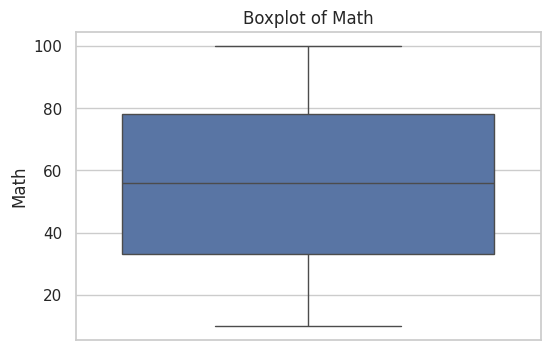

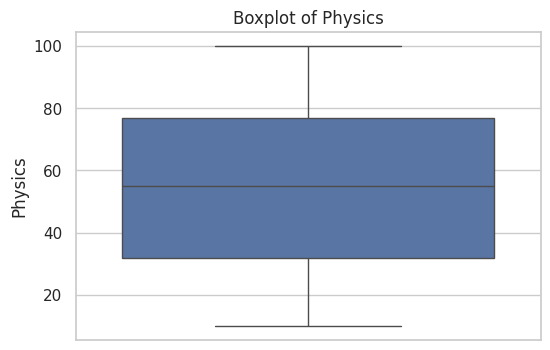

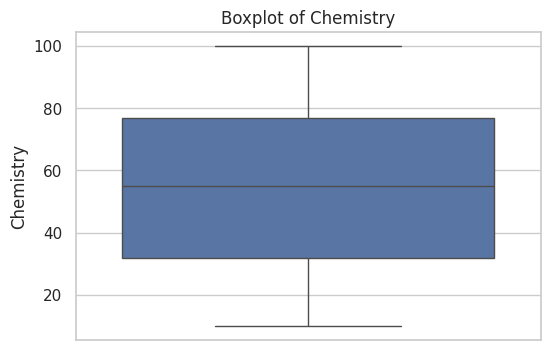

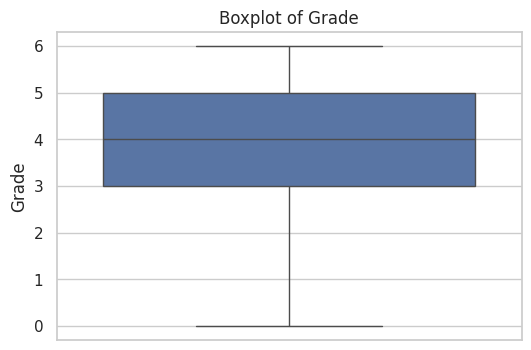

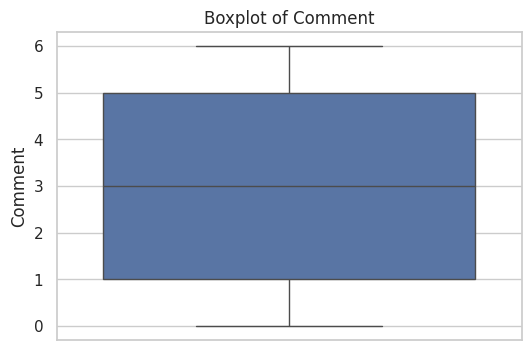

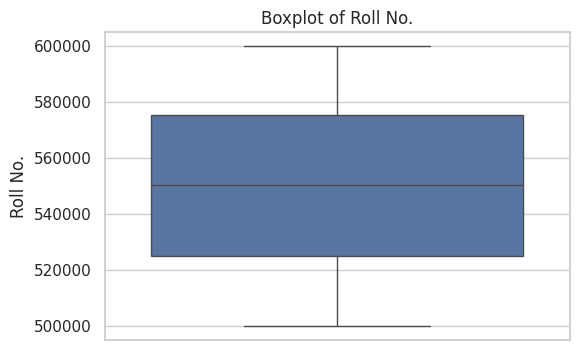

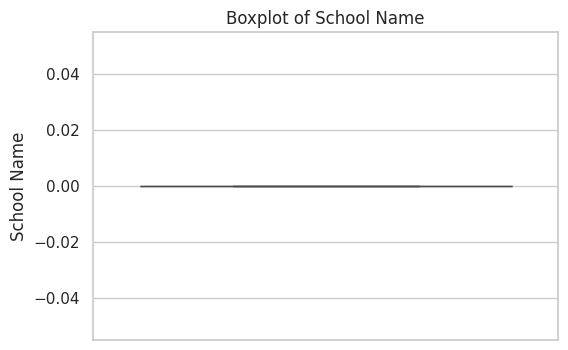

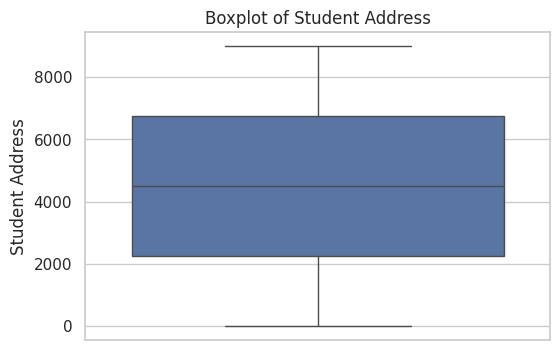

In [ ]:
# Step 6: Boxplots (to detect outliers)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


***[Correlation Analysis ](https://)***

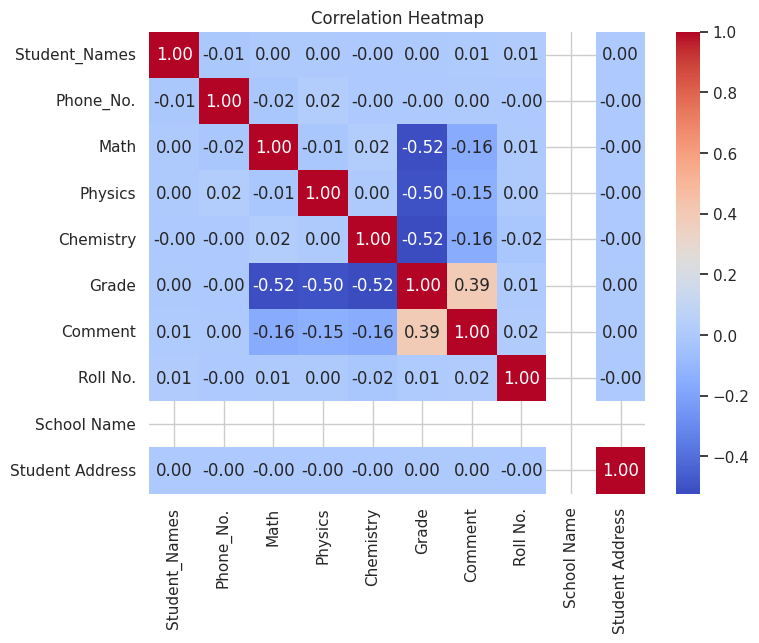

In [ ]:

plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


*** Categorical Data Analysis***

In [ ]:

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()


*** Pairplot (Numeric columns relationship)***

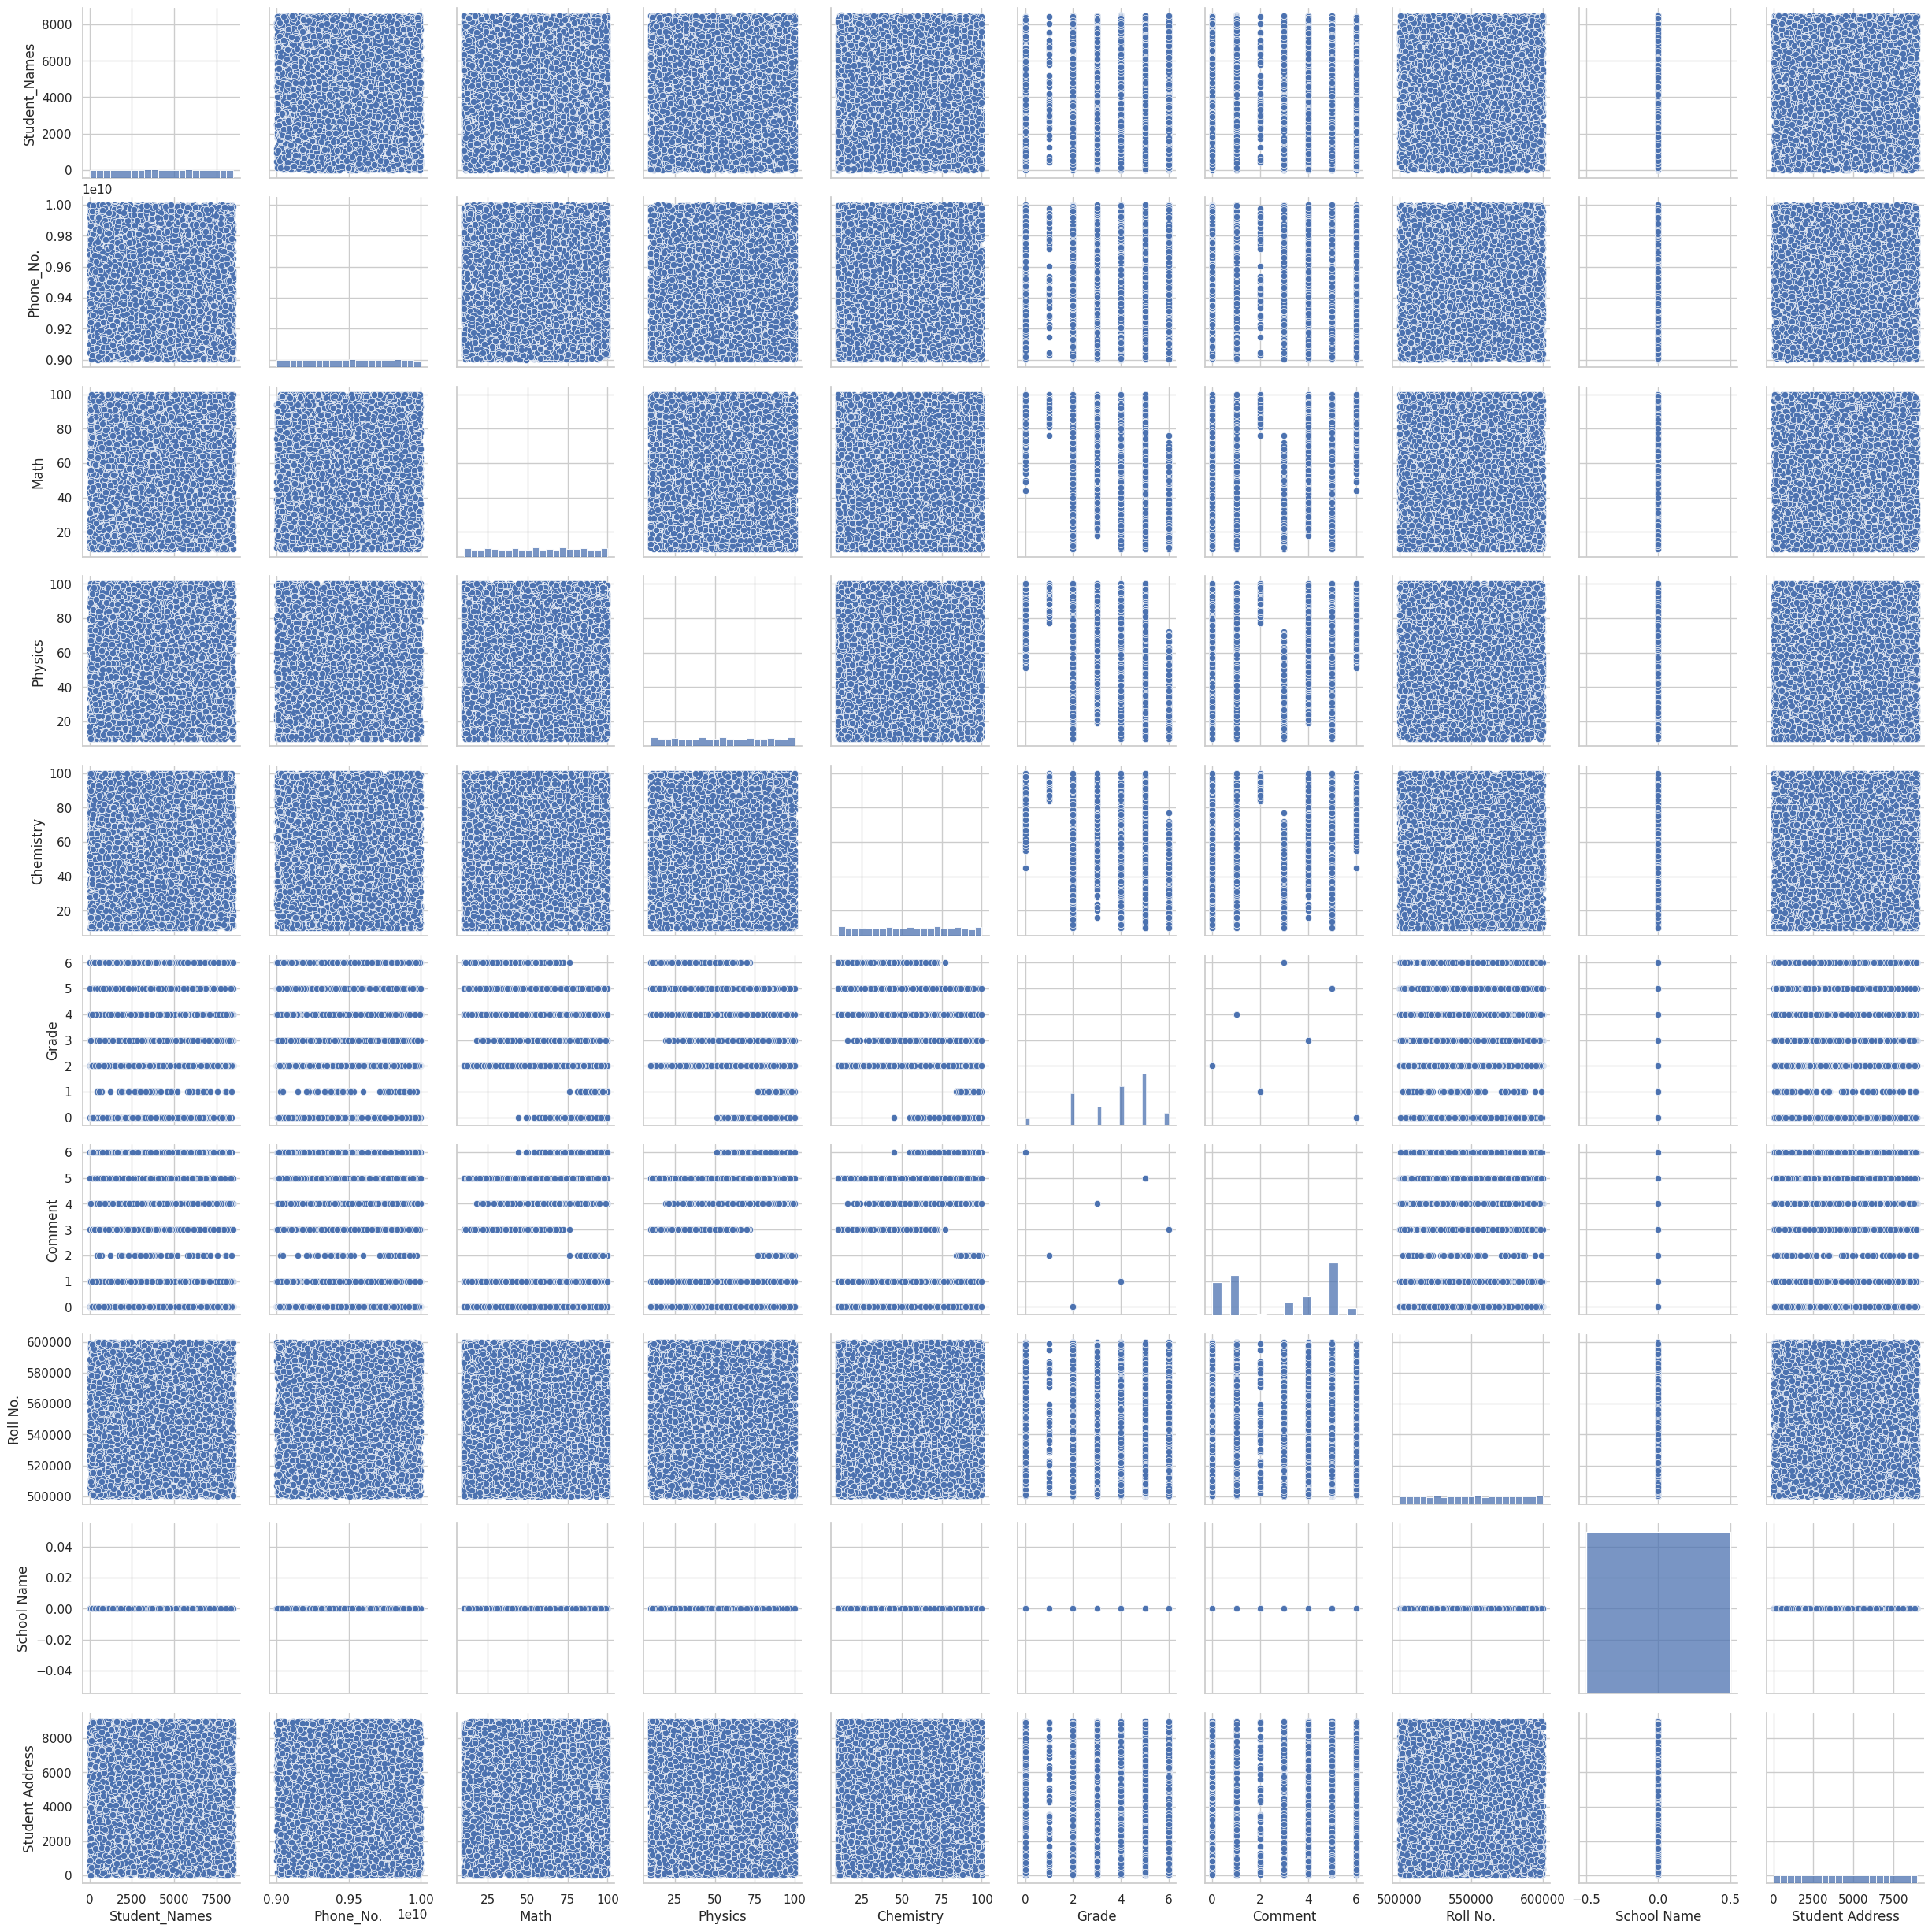

In [ ]:

sns.pairplot(df[numeric_cols])
plt.show()


#Insights Examples,Average marks


In [ ]:

df['average'] = df[['Math','Physics','Chemistry']].mean(axis=1)
print("Top 5 students by average marks:")
print(df[['Student_Names','average']].sort_values(by='average', ascending=False).head())




Top 5 students by average marks:
      Student_Names    average
8270           5180  97.000000
7015           4213  97.000000
3874           2666  97.000000
1538           5791  96.666667
8607            574  96.666667


# Passing Rate

In [ ]:

if 'Grade' in df.columns:
    df['pass'] = df['Grade'].apply(lambda x: 0 if str(x).upper()=='F' else 1)
    pass_rate = df['pass'].mean()*100
    print(f"Passing rate: {pass_rate:.2f}%")

Passing rate: 100.00%


# `Subject-wise Performance Analysis`

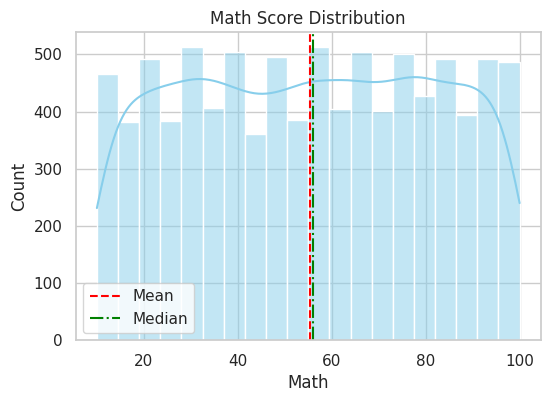

Math - Mean: 55.28, Median: 56.00, Max: 100, Min: 10


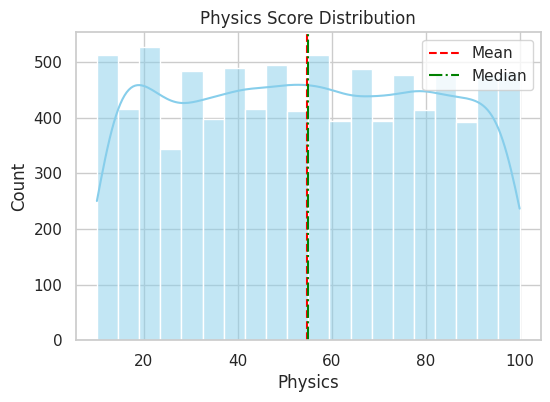

Physics - Mean: 54.70, Median: 55.00, Max: 100, Min: 10


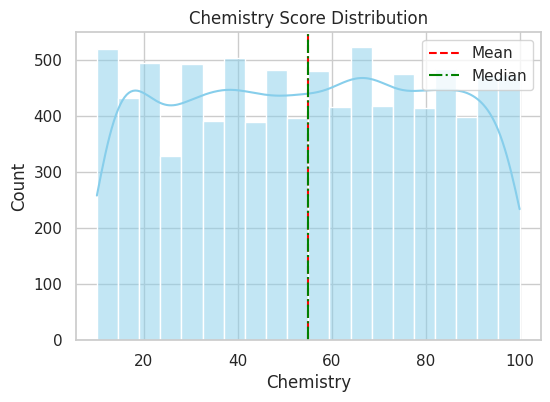

Chemistry - Mean: 54.85, Median: 55.00, Max: 100, Min: 10


In [ ]:
subjects = ['Math','Physics','Chemistry']
for sub in subjects:
    plt.figure(figsize=(6,4))
    sns.histplot(df[sub], bins=20, kde=True, color='skyblue')
    plt.axvline(df[sub].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[sub].median(), color='green', linestyle='-.', label='Median')
    plt.title(f'{sub} Score Distribution')
    plt.legend()
    plt.show()

    print(f"{sub} - Mean: {df[sub].mean():.2f}, Median: {df[sub].median():.2f}, Max: {df[sub].max()}, Min: {df[sub].min()}")


# **Top / Bottom Performers**

In [ ]:
df['average'] = df[subjects].mean(axis=1)
top_5 = df[['Student_Names','average']].sort_values(by='average', ascending=False).head(5)
bottom_5 = df[['Student_Names','average']].sort_values(by='average').head(5)

print("🏆 Top 5 Students:\n", top_5)
print("\n💀 Bottom 5 Students:\n", bottom_5)


🏆 Top 5 Students:
       Student_Names    average
8270           5180  97.000000
7015           4213  97.000000
3874           2666  97.000000
1538           5791  96.666667
8607            574  96.666667

💀 Bottom 5 Students:
       Student_Names    average
2587           3795  11.000000
8771           7926  12.000000
5821           2227  13.666667
3108            852  13.666667
185            6374  13.666667


# ***Pass/Fail Analysis***

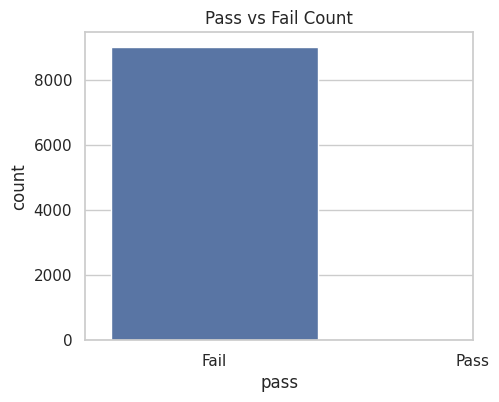

Passing rate: 100.00%


In [ ]:
if 'Grade' in df.columns:
    df['pass'] = df['Grade'].apply(lambda x: 0 if str(x).upper()=='F' else 1)
    plt.figure(figsize=(5,4))
    sns.countplot(x='pass', data=df)
    plt.xticks([0,1], ['Fail','Pass'])
    plt.title('Pass vs Fail Count')
    plt.show()

    pass_rate = df['pass'].mean()*100
    print(f"Passing rate: {pass_rate:.2f}%")


***School-wise Performance Comparison***

Math    Physics  Chemistry    average
School Name                                            
0            55.276111  54.697556  54.854889  54.942852

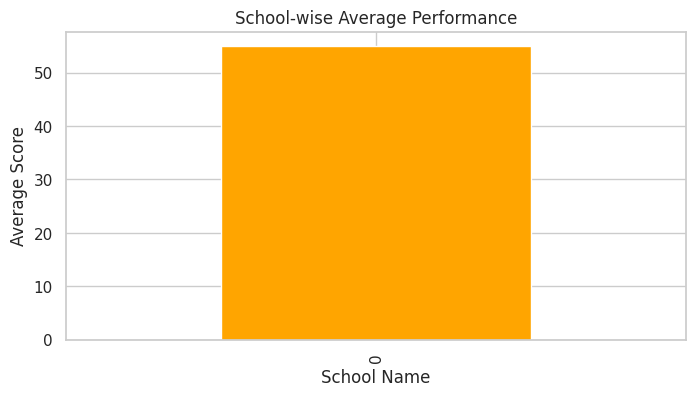

In [ ]:
if 'School Name' in df.columns:
    school_avg = df.groupby('School Name')[subjects + ['average']].mean()
    display(school_avg)

    school_avg['average'].sort_values().plot(kind='bar', figsize=(8,4), color='orange')
    plt.ylabel('Average Score')
    plt.title('School-wise Average Performance')
    plt.show()


***Correlation Analysis (Subject Relations)***

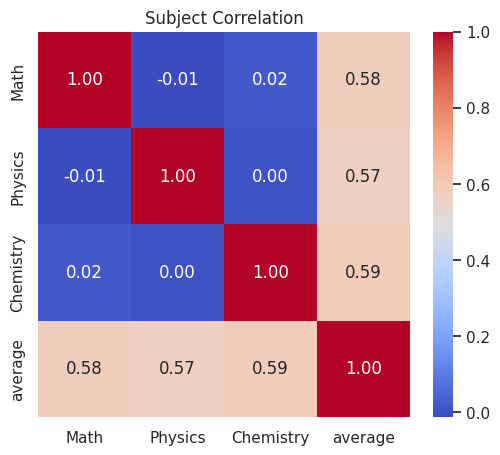

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df[subjects + ['average']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Subject Correlation")
plt.show()


***Clustering Students (Performance Groups)***

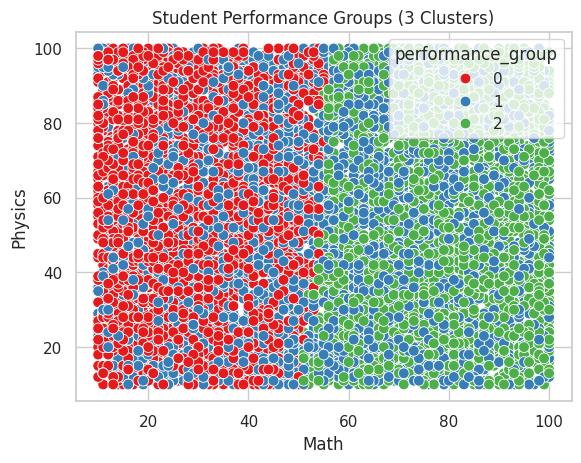

                        Math    Physics  Chemistry    average
performance_group                                            
0                  29.929913  56.716763  69.550217  52.065631
1                  56.369526  53.217157  27.037493  45.541392
2                  78.227398  54.472050  72.821256  68.506901


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df[subjects].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['performance_group'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=df, x='Math', y='Physics', hue='performance_group', palette='Set1', s=60)
plt.title("Student Performance Groups (3 Clusters)")
plt.show()

print(df.groupby('performance_group')[subjects + ['average']].mean())


***Gender / Demographic Analysis***

In [ ]:
if 'Gender' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x='Gender', data=df)
    plt.title('Gender Distribution')
    plt.show()

    gender_avg = df.groupby('Gender')['average'].mean()
    print("Average by Gender:\n", gender_avg)


***Attendance / StudyHours vs Scores (Scatter Analysis)***

In [ ]:
for sub in subjects:
    if 'StudyHours' in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x='StudyHours', y=sub, data=df)
        plt.title(f'{sub} vs StudyHours')
        plt.show()
